# Conversion Rate Analysis

---

In [175]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import train test split
from sklearn.model_selection import train_test_split
#import logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

## Importing and Exploring Data

In [112]:
data = pd.read_csv('conversion_data.csv')

In [113]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [115]:
data.isnull().sum().to_frame()

,0
country,0
age,0
new_user,0
source,0
total_pages_visited,0
converted,0


In [116]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Obesevation

- Relatively young user age
- Ages factor might contians outliers due to the maximum age(123)

In [117]:
uniques = sorted(data['age'].unique())
print(uniques)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]


## Remove Outliers

In [118]:
data[data['age'] > 70]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [119]:
data[data['age'] > 80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [120]:
data = data[data['age'] < 80]

## Exploratory Data Analysis

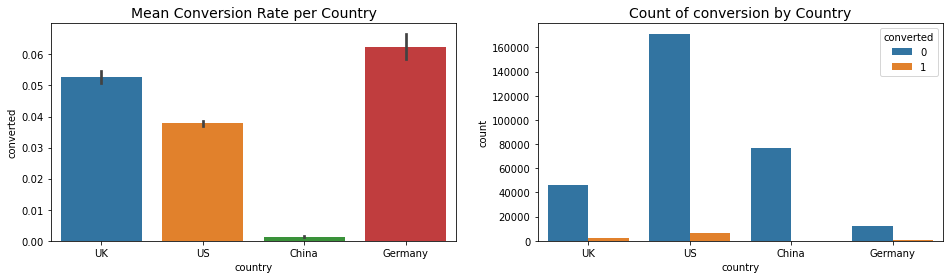

In [121]:
# visualization of average conversion rate by different countries
#data_c = data[['country', 'converted']]
#grouped_c = data_c.groupby('country').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.barplot(x ='country', y ='converted', data = data, ax=ax[0]);
ax[0].set_title('Mean Conversion Rate per Country', fontsize=14)
sns.countplot(x='country', hue='converted',data=data, ax=ax[1]);
ax[1].set_title('Count of conversion by Country', fontsize=14)
plt.show()

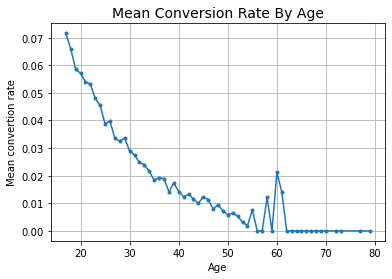

In [122]:
# visulization by ages
grouped_a = data[['age', 'converted']].groupby('age').mean().reset_index()
plt.plot(grouped_a['age'], grouped_a['converted'], '.-')
plt.title('Mean Conversion Rate By Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Mean convertion rate')
plt.grid(True)
plt.show()

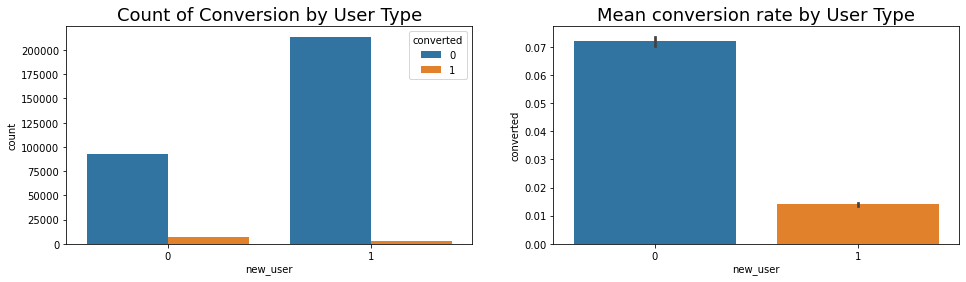

In [123]:
# Visulization by user type (whether new user or not)
# grouped_n = data[['new_user', 'converted']].groupby('new_user').mean()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.countplot(data=data, x='new_user', hue='converted',ax=ax[0])
ax[0].set_title('Count of Conversion by User Type',fontsize=18)
sns.barplot(data=data,x='new_user',y='converted',ax=ax[1])
ax[1].set_title('Mean conversion rate by User Type', fontsize=18)
plt.show()

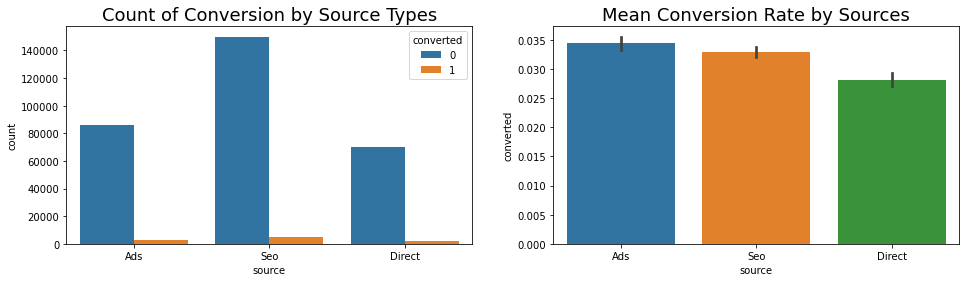

In [124]:
# Visulization by Sources
# grouped_s = data[['source', 'converted']].groupby('source').mean()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.barplot(data=data,x='source',y='converted', ax=ax[1])
sns.countplot(data=data,x='source',hue='converted',ax=ax[0])
ax[0].set_title('Count of Conversion by Source Types',fontsize=18)
ax[1].set_title('Mean Conversion Rate by Sources',fontsize=18)
plt.show()

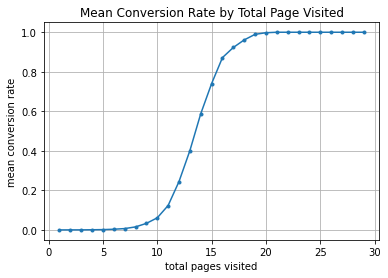

In [125]:
# Visulization by total page visited
grouped_t = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
plt.plot(grouped_t['total_pages_visited'], grouped_t['converted'], '.-')
plt.grid(True)
plt.title('Mean Conversion Rate by Total Page Visited')
plt.xlabel('total pages visited')
plt.ylabel('mean conversion rate')
plt.show()

## Observation

* China has a large number of user but with a extremely low conversion rate
* Mean Conversion Rate drop dramtically along with the increasing ages. This means that the site works well for young users.
* New users are less likely to convert within the session
* People are more likely to convert after reading 15 pages during the session

## Correlations

In [126]:
corr = data.corr()
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


## Machine Learning: Logistic Regression

In [127]:
df = data.copy()
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [128]:
# convert categorical data to numerical
df=pd.get_dummies(df, columns=['country','source'], 
                      prefix=['country','source'])
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [129]:
X = df[['age','new_user','total_pages_visited','country_China',
       'country_Germany','country_UK','country_US','source_Ads',
      'source_Direct','source_Seo']]
y = df[['converted']]

In [151]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.67352139,  0.67738814, -1.15919261, -0.56543186, -0.20752225,
         2.3508316 , -1.13557529,  1.60101093, -0.54504455, -0.98082877],
       [-0.91539023,  0.67738814,  0.0380365 , -0.56543186, -0.20752225,
        -0.42538138,  0.88061092, -0.62460535, -0.54504455,  1.01954595],
       [-0.31071813,  0.67738814, -0.26127078, -0.56543186, -0.20752225,
        -0.42538138,  0.88061092, -0.62460535, -0.54504455,  1.01954595],
       [ 1.01956047,  0.67738814,  0.0380365 ,  1.76855971, -0.20752225,
        -0.42538138, -1.13557529, -0.62460535, -0.54504455,  1.01954595],
       [-0.0688493 ,  0.67738814,  0.33734377, -0.56543186, -0.20752225,
        -0.42538138,  0.88061092, -0.62460535, -0.54504455,  1.01954595]])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X Training Shape:', X_train.shape)
print('y Training Shape:', y_train.shape)
print('X Testing Shape:', X_test.shape)
print('y Testing Shape:', y_test.shape)

X Training Shape: (211852, 10)
y Training Shape: (211852, 1)
X Testing Shape: (104346, 10)
y Testing Shape: (104346, 1)


In [138]:
#RF = RandomForestClassifier(n_estimators = 200)
#RF.fit(X_train, y_train.values.ravel())
#RF.score(X_train, y_train)

0.988355078073372

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())
LR

LogisticRegression(C=0.01, solver='liblinear')

In [154]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
# the first column is the probability of class 1,
# P(Y=1|X), and second column is probability of class 0, P(Y=0|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.99690403e-01, 3.09596539e-04],
       [9.99936205e-01, 6.37954472e-05],
       [9.97289734e-01, 2.71026601e-03],
       ...,
       [9.83975276e-01, 1.60247244e-02],
       [9.99799368e-01, 2.00631918e-04],
       [9.99925357e-01, 7.46427703e-05]])

In [234]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  2231   1086]
 [   305 100724]]


[[  2231   1086]
 [   305 100724]]


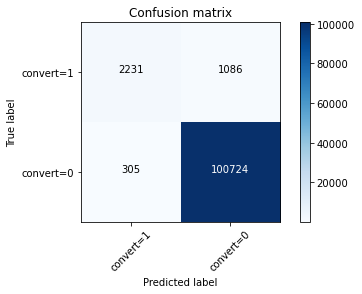

In [236]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['convert=1','convert=0'],normalize= False,  title='Confusion matrix')

### Observation of Confusion Matrix

* For 2231 customers with actual converted value 1, the classifier correctly predicted those as 1. 
* However, while the classifier label of 1086 were 1, the classifier predicted those as 0.
* For 100724 customers with actual converted value 0, the classifier correctly predicted those as 0, with only 305 of them are wrongly predicted as 1.

In [182]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    101029
           1       0.88      0.67      0.76      3317

    accuracy                           0.99    104346
   macro avg       0.93      0.83      0.88    104346
weighted avg       0.99      0.99      0.99    104346



In [208]:
importance = abs(LR.coef_) 
importance = importance.tolist()
importance

[[0.45422621432713284,
  0.6046713242473661,
  1.9669122914581056,
  0.5394177780157657,
  0.1771205903400515,
  0.2618422532137543,
  0.20476109860447145,
  0.017894514399159955,
  0.03662007751338916,
  0.014698568000387706]]

In [228]:
variables = [['age','new_user','total_pages_visited','country_China',
       'country_Germany','country_UK','country_US','source_Ads',
      'source_Direct','source_Seo']]

In [239]:
importances_df = pd.DataFrame({"variables":variables[0],"coef":importance[0]})
importances_df.sort_values(by="coef",inplace=True,ascending=False)
importances_df

,variables,coef
2,total_pages_visited,1.966912
1,new_user,0.604671
3,country_China,0.539418
0,age,0.454226
5,country_UK,0.261842
6,country_US,0.204761
4,country_Germany,0.177121
8,source_Direct,0.036620
7,source_Ads,0.017895
9,source_Seo,0.014699


[]

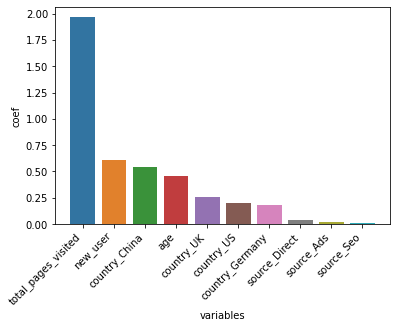

In [240]:
sns.barplot(data=importances_df,x='variables', y='coef')
plt.xticks(rotation=45, ha='right')
plt.plot()

## Conclusion And Suggestions

1. Old users tend to do better. Try to send targeted emails to keep touch with them and bring them back. Special offers may be a good choice. 
2. Chinese users contibuted to a large portion of our conversion rate, but, their conversion rate are extremely low. Company should take in actions since China is such a huge opportunities. Maybe there is a issue with the Chinese version website, such as poor translate. 

3. Young people should be the targerted group for the website.

4. Users tend to buy after reading 15 pages. Enhance user experience on the website maybe a good choice to let them stay longer. 

5. Also, if someone visited many pages, but hasn't converted, since there is a high chance that this people would purchase, pushing targeted offers can be a good chice.